<a href="https://colab.research.google.com/github/AlnBnd/facegan/blob/master/face_edited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==1.14
!pip install tensorflow-gpu==1.14

In [ ]:
!pip install numpy==1.16.4

In [ ]:
import os
import math
import pickle
import imageio
import PIL.Image
import numpy as np
from PIL import Image
import tensorflow as tf


import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

In [4]:
!git clone https://github.com/AlnBnd/facegan.git

Cloning into 'facegan'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 263 (delta 13), reused 2 (delta 0), pack-reused 234
Receiving objects: 100% (263/263), 107.27 MiB | 21.19 MiB/s, done.
Resolving deltas: 100% (28/28), done.


In [20]:
os.chdir('/content/facegan/networks')

In [11]:
!wget https://nvlabs-fi-cdn.nvidia.com/stylegan2/networks/stylegan2-ffhq-config-f.pkl

[Errno 2] No such file or directory: 'networks'
/content/facegan/networks
--2021-02-23 08:18:15--  https://nvlabs-fi-cdn.nvidia.com/stylegan2/networks/stylegan2-ffhq-config-f.pkl
Resolving nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)... 54.192.86.129, 54.192.86.110, 54.192.86.95, ...
Connecting to nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)|54.192.86.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381673535 (364M) [application/x-www-form-urlencoded]
Saving to: ‘stylegan2-ffhq-config-f.pkl’

stylegan2-ffhq-conf 100%[===================>] 363.99M   102MB/s    in 3.8s    

2021-02-23 08:18:19 (96.7 MB/s) - ‘stylegan2-ffhq-config-f.pkl’ saved [381673535/381673535]



In [21]:
os.chdir('/content/facegan')

In [ ]:
# !python main.py

In [15]:
!python photo_edit.py

In [16]:
from photo_edit import read_face_latent
from photo_edit import move_latent_and_save

In [17]:
w, Gs_network, Gs_syn_kwargs = read_face_latent()

Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


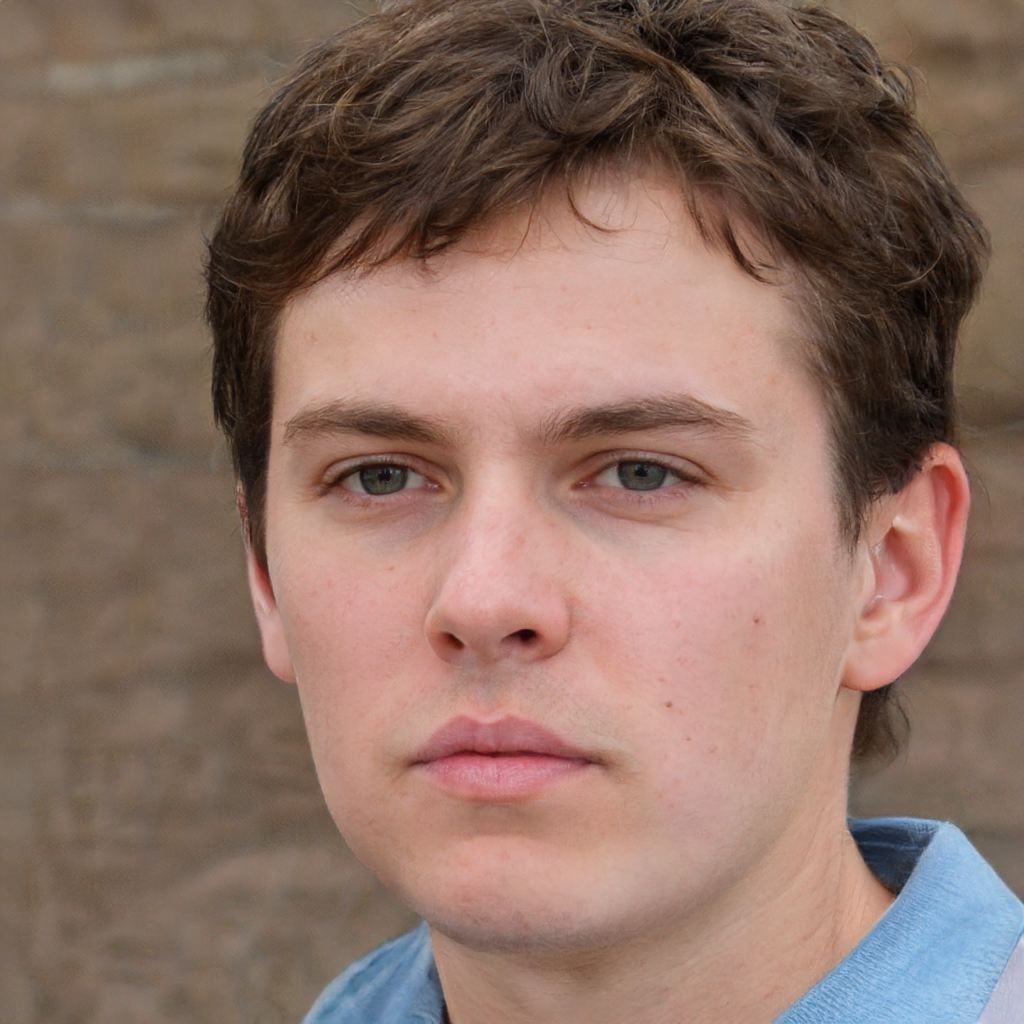

In [18]:
# @title { display-mode: "form", run: "auto" }
#@markdown **Выберите параметры:**
parameter1 = 'gender' #@param ["age", "angle_horizontal",  "angle_pitch", "beauty", "emotion_angry", "emotion_disgust", "emotion_easy", "emotion_fear", "emotion_happy", "emotion_sad", "emotion_surprise", "eyes_open", "face_shape", "gender", "glasses", "height", "race_black", "race_white", "race_yellow", "smile", "width"]
direction_file1 = np.load('latent_directions/' + parameter1 + '.npy')
intensity1 = -1.5 #@param {type:"slider", min:-10.0, max:10.0, step:0.5}
active1 = True #@param {type:"boolean"}
if active1 == True:
    intensity1 *= 1
else:
    intensity1 *= 0

parameter2 = 'angle_pitch' #@param ["age", "angle_horizontal",  "angle_pitch", "beauty", "emotion_angry", "emotion_disgust", "emotion_easy", "emotion_fear", "emotion_happy", "emotion_sad", "emotion_surprise", "eyes_open", "face_shape", "gender", "glasses", "height", "race_black", "race_white", "race_yellow", "smile", "width"]
direction_file2 = np.load('latent_directions/' + parameter2 + '.npy')
intensity2 = -2 #@param {type:"slider", min:-10.0, max:10.0, step:0.5}
active2 = True #@param {type:"boolean"}
if active2 == True:
    intensity2 *= 2
else:
    intensity2 *= 0

parameter3 = 'emotion_happy' #@param ["age", "angle_horizontal",  "angle_pitch", "beauty", "emotion_angry", "emotion_disgust", "emotion_easy", "emotion_fear", "emotion_happy", "emotion_sad", "emotion_surprise", "eyes_open", "face_shape", "gender", "glasses", "height", "race_black", "race_white", "race_yellow", "smile", "width"]
direction_file3 = np.load('latent_directions/' + parameter2 + '.npy')
intensity3 = 5.5 #@param {type:"slider", min:-10.0, max:10.0, step:0.5}
active3 = True #@param {type:"boolean"}
if active3 == True:
    intensity3 *= 1
else:
    intensity3 *= 0

parameter4 = 'smile' #@param ["age", "angle_horizontal",  "angle_pitch", "beauty", "emotion_angry", "emotion_disgust", "emotion_easy", "emotion_fear", "emotion_happy", "emotion_sad", "emotion_surprise", "eyes_open", "face_shape", "gender", "glasses", "height", "race_black", "race_white", "race_yellow", "smile", "width"]
direction_file4 = np.load('latent_directions/' + parameter4 + '.npy')
intensity4 = 4 #@param {type:"slider", min:-10.0, max:10.0, step:0.5}
active4 = True #@param {type:"boolean"}
if active4 == True:
    intensity4 *= 1
else:
    intensity4 *= 0

parameter5 = 'glasses' #@param ["age", "angle_horizontal",  "angle_pitch", "beauty", "emotion_angry", "emotion_disgust", "emotion_easy", "emotion_fear", "emotion_happy", "emotion_sad", "emotion_surprise", "eyes_open", "face_shape", "gender", "glasses", "height", "race_black", "race_white", "race_yellow", "smile", "width"]
direction_file5 = np.load('latent_directions/' + parameter3 + '.npy')
intensity5 = -10 #@param {type:"slider", min:-10.0, max:10.0, step:0.5}
active5 = False #@param {type:"boolean"}
if active5 == True:
    intensity5 *= 1
else:
    intensity5 *= 0

#@markdown **Разрешение изображения:**
resolution = "1024" #@param [128, 256, 512, 1024]
size = int(resolution), int(resolution)


direction_intensity = (direction_file1 * intensity1) + (direction_file2 * intensity2) + \
                (direction_file3 * intensity3)  + (direction_file4 * intensity4) + (direction_file5 * intensity5)
move_latent_and_save(w, size, direction_intensity, Gs_network, Gs_syn_kwargs)